## P1: Realize mnist dataset
>- **🍨 The oringal chinese version is [🔗365DeepLearning Camp](https://mp.weixin.qq.com/s/Nb93582M_5usednAKp_Jtw)**
>- **🍖 Original author：[K同学啊 | 接辅导、项目定制](https://mtyjkh.blog.csdn.net/)**
>- **🚀 Source：[K同学的学习圈子](https://www.yuque.com/mingtian-fkmxf/zxwb45)**
>- **This English version is a learning translated version by Gaoyang**

### Environment
- Langeage environment: Python3.9
- Compiler: Jupyter 
- Deeplearning environment: 
    - torch
    - torchvision

### First step: Preparation
#### 1. Set GPU


In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

#### 2. Imput data
Use dataset to download MNIST dataset, and devide the training set and test set.


```torchvision.datasets.MNIST(root, train=True, transform=None, target_transform=None, download=False)```

- root (string) ：location of data
- train (string) ：True-training set，False-test set
- download (bool,optional) : if True，download data from Internet and save it under root dir
- transform (callable, optional )：choose one function
- target_transform (callable,optional) ：fuction that accept the target and transform

In [5]:
train_ds = torchvision.datasets.MNIST('data', 
                                      train=True, 
                                      transform=torchvision.transforms.ToTensor(), # transfer data to Tensor
                                      download=True)

test_ds  = torchvision.datasets.MNIST('data', 
                                      train=False, 
                                      transform=torchvision.transforms.ToTensor(), # transfer data to Tensor
                                      download=True)

`torch.utils.data.DataLoader` \

Function details:\

```torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=None, sampler=None, batch_sampler=None, num_workers=0, collate_fn=None, pin_memory=False, drop_last=False, timeout=0, worker_init_fn=None, multiprocessing_context=None, generator=None, *, prefetch_factor=2, persistent_workers=False, pin_memory_device='')```

Parameter explanations:

- **dataset** (string): The dataset to load.
- **batch_size** (int, optional): The number of samples per batch to load (default: 1).
- **shuffle** (bool, optional): If `True`, reshuffles the data at every epoch.
- **sampler** (Sampler or iterable, optional): Defines the strategy for sampling from the dataset. It can be any Iterable that implements **\_\_len\_\_**. If specified, shuffle should not be specified.
- **batch_sampler** (Sampler or iterable, optional): Similar to sampler, but returns a batch of indices at a time. Mutually exclusive with batch_size, shuffle, sampler, and drop_last.
- **num_workers** (int, optional): The number of subprocesses to use for data loading. 0 means that the data will be loaded in the main process (default: 0).
- **pin_memory** (bool, optional): If True, the data loader will copy tensors to pinned memory in the device/CUDA before returning. This is useful for custom types or if the collate_fn returns a custom type batch.
- **drop_last** (bool, optional): If the size of the dataset is not divisible by the batch size, set drop_last to True to drop the last incomplete batch. If False and the size of the dataset is not divisible by the batch size, the last batch will be kept (default: False).
- **timeout** (numeric, optional): The timeout value for data loading. If the data is not loaded within this time, an error will be raised (default: 0).
- **worker_init_fn** (callable, optional): If not None, this will be called on each worker subprocess after seeding and before data loading. It will be called in the order of worker IDs (an int from [0, num_workers-1]). (default: None)  

In [6]:
batch_size = 32

train_dl = torch.utils.data.DataLoader(train_ds, 
                                       batch_size=batch_size, 
                                       shuffle=True)

test_dl  = torch.utils.data.DataLoader(test_ds, 
                                       batch_size=batch_size)

In [7]:
# choose one batch to check the type of data
# shape：[batch_size, channel, height, weight]
# batch_size is customed designed，channel，height and weight are the lanes, height and width of the picture
imgs, labels = next(iter(train_dl))
imgs.shape

torch.Size([32, 1, 28, 28])

#### 3. Visialization

The function `squeeze()` is to delet the dimension one from the shape of the matrix. For example, if the shape of the matrix W is (5,1), after `squeeze(W)`, the result is (5,).

In [ ]:
import numpy as np

 #point the size of the picture, width=20,height=5(inch)
plt.figure(figsize=(20, 5)) 
for i, imgs in enumerate(imgs[:20]):
    #dimensionality reduction
    npimg = np.squeeze(imgs.numpy())
    # divide the figure into 2 rows, 10 colums，drawing i+1 sub-picture。
    plt.subplot(2, 10, i+1)
    plt.imshow(npimg, cmap=plt.cm.binary)
    plt.axis('off')
    # plt.show()

In [5]:
import torch.nn.functional as F

num_classes = 10  # type of classes of the pictures (0,1,2,3,4,5,6,7,8,9, ten in total)

class Model(nn.Module):
     def __init__(self):
        super().__init__()
         #extract the feature of the network
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)  #First convolution layer, kernal size=3*3
        self.pool1 = nn.MaxPool2d(2)                  #Setting pooling layer, kernal size=2*2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3) #Second convolution layer,kernal size=3*3   
        self.pool2 = nn.MaxPool2d(2) 
                                      
        #classify the network
        self.fc1 = nn.Linear(1600, 64)          
        self.fc2 = nn.Linear(64, num_classes)
     #forward propagate
     def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))     
        x = self.pool2(F.relu(self.conv2(x)))

        x = torch.flatten(x, start_dim=1)

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
       
        return x

In [7]:
from torchinfo import summary
#Put the model into GPU
model = Model().to(device)

summary(model)

Layer (type:depth-idx)                   Param #
Model                                    --
├─Conv2d: 1-1                            320
├─MaxPool2d: 1-2                         --
├─Conv2d: 1-3                            18,496
├─MaxPool2d: 1-4                         --
├─Linear: 1-5                            102,464
├─Linear: 1-6                            650
Total params: 121,930
Trainable params: 121,930
Non-trainable params: 0

### Third step: Training the model
#### 1. Set hyperparameter

In [8]:
loss_fn    = nn.CrossEntropyLoss() # create loss function
learn_rate = 1e-2 # learning rate
opt        = torch.optim.SGD(model.parameters(),lr=learn_rate)

#### 2. Compire Training function

1.`optimizer.zero_grad()`\
The `optimizer.zero_grad()` function iterates through all the parameters of the model. It truncates the gradient flow during backpropagation using its built-in method and sets the gradient value of each parameter to zero, effectively clearing the previous gradient records.

2.`loss.backward()` \
The `loss.backward()` function in PyTorch, implemented through the autograd package, automatically calculates the gradients based on the mathematical operations performed on the tensors.
Specifically, torch.tensor is the fundamental class of the autograd package. If you set requires_grad=True for a tensor, it starts tracking all the operations performed on that tensor. When you call tensor.backward() after performing the operations, the gradients are automatically computed, and the gradients of the tensor accumulate in its .grad attribute.

More specifically, the loss function (loss) is obtained through a series of operations on the model's weights (w). If requires_grad=True for a certain weight (w), the .grad_fn attribute of its upstream parameters (weights in subsequent layers) stores the corresponding operations. After calling loss.backward(), the gradients for each weight (w) are computed through backpropagation, and they are saved in the .grad attribute.

If tensor.backward() is not called, the gradient values will be None. Therefore, it is important to call loss.backward() before optimizer.step().

3.`optimizer.step()`\
The `optimizer.step()` function performs one optimization step, updating the parameter values using gradient descent. Since gradient descent relies on gradients, it is necessary to compute the gradients by calling loss.backward() before executing optimizer.step().

Note: The optimizer is responsible for optimization using gradient descent, but it does not generate gradients. The gradients are generated by the tensor.backward() method."

In [9]:
# Training loop 
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)  # Size of training set，60000 pictures in total
    num_batches = len(dataloader)   # Number of batches，1875（60000/32）

    train_loss, train_acc = 0, 0  #  Initialize rate of loss and accuracy
    
    for X, y in dataloader:  # acquire picture and label
        X, y = X.to(device), y.to(device)
        
        # Calculate loss
        pred = model(X)          # output (use prediction as output)
        loss = loss_fn(pred, y)  # to calcualte the diviation between the prediction and ground truth，targets are ground truth，loss is the diviation between two of them
        
        # backward propagate
        optimizer.zero_grad()  # clean grad
        loss.backward()        # back prop
        optimizer.step()       # auto-upgrade in every step
        
        # Record acc & loss
        train_acc  += (pred.argmax(1) == y).type(torch.float).sum().item()
        train_loss += loss.item()
            
    train_acc  /= size
    train_loss /= num_batches

    return train_acc, train_loss

- pred.argmax(1) returns the indices of the maximum values along the first axis (i.e., rows) of the array pred. This is commonly used in multi-class classification problems, where pred is a 2D array containing the predicted probabilities, with each row representing the probability distribution for a sample.
- (pred.argmax(1) == y) is a Boolean value, where the equality represents whether the prediction for the corresponding sample is correct (True indicates correct, False indicates incorrect).
- .type(torch.float) converts the data type of the Boolean array to floating-point, i.e., True is converted to 1.0, and False is converted to 0.0.
- .sum() calculates the sum of the elements in the array, resulting in the count of correctly predicted samples.
- .item() converts the sum result to a scalar value, allowing it to be used or printed in Python.

(pred.argmax(1) == y).type(torch.float).sum().item() calculates the count of correctly predicted samples and returns it as a scalar value. This is commonly used to evaluate the accuracy of a classification model or calculate the number of correctly predicted samples in a classification problem.

#### 3. Write test function
The testing function is similar to the training function, but since it does not perform gradient descent to update the network weights, there is no need to pass in an optimizer.

In [10]:
def test (dataloader, model, loss_fn):
    size        = len(dataloader.dataset)  #Size of testing set, 10000 pictures in total
    num_batches = len(dataloader)          #number of batches, 313（10000/32=312.5，rounding up）
    test_loss, test_acc = 0, 0
    
    #when not training, stop upgrade gradient to save RAM
    with torch.no_grad():
        for imgs, target in dataloader:
            imgs, target = imgs.to(device), target.to(device)
            
            # calculate loss
            target_pred = model(imgs)
            loss        = loss_fn(target_pred, target)
            
            test_loss += loss.item()
            test_acc  += (target_pred.argmax(1) == target).type(torch.float).sum().item()

    test_acc  /= size
    test_loss /= num_batches

    return test_acc, test_loss

#### 4. Training

1.`model.train()`\
The purpose of model.train() is to enable Batch Normalization and Dropout.

If the model includes Batch Normalization (BN) layers and Dropout, model.train() needs to be added during training. model.train() ensures that BN layers utilize the mean and variance of each batch of data. For Dropout, model.train() randomly selects a subset of network connections to train and update the parameters.

2.`model.eval()`\
The purpose of model.eval() is to disable Batch Normalization and Dropout.

If the model includes Batch Normalization (BN) layers and Dropout, model.eval() should be added during testing. model.eval() ensures that BN layers utilize the mean and variance of the entire training data, maintaining consistent mean and variance during the testing process. For Dropout, model.eval() utilizes all the network connections, without randomly dropping neurons.

After training the model with the training samples, the generated model (model) is used for testing samples. Before using model(test), model.eval() needs to be added. Otherwise, even with input data, it will still modify the weights. This behavior is due to the presence of BN layers and Dropout in the model.


In [12]:
epochs     = 20
train_loss = []
train_acc  = []
test_loss  = []
test_acc   = []

for epoch in range(epochs):
    model.train()
    epoch_train_acc, epoch_train_loss = train(train_dl, model, loss_fn, opt)
    
    model.eval()
    epoch_test_acc, epoch_test_loss = test(test_dl, model, loss_fn)
    
    train_acc.append(epoch_train_acc)
    train_loss.append(epoch_train_loss)
    test_acc.append(epoch_test_acc)
    test_loss.append(epoch_test_loss)
    
    template = ('Epoch:{:2d}, Train_acc:{:.1f}%, Train_loss:{:.3f}, Test_acc:{:.1f}%,Test_loss:{:.3f}')
    print(template.format(epoch+1, epoch_train_acc*100, epoch_train_loss, epoch_test_acc*100, epoch_test_loss))
print('Done')

Epoch: 1, Train_acc:98.8%, Train_loss:0.041, Test_acc:98.9%，Test_loss:0.034
Epoch: 2, Train_acc:98.9%, Train_loss:0.038, Test_acc:98.6%，Test_loss:0.041
Epoch: 3, Train_acc:99.0%, Train_loss:0.035, Test_acc:98.5%，Test_loss:0.047
Epoch: 4, Train_acc:99.0%, Train_loss:0.033, Test_acc:98.9%，Test_loss:0.032
Epoch: 5, Train_acc:99.0%, Train_loss:0.032, Test_acc:98.9%，Test_loss:0.034
Epoch: 6, Train_acc:99.1%, Train_loss:0.029, Test_acc:99.0%，Test_loss:0.031
Epoch: 7, Train_acc:99.2%, Train_loss:0.027, Test_acc:98.9%，Test_loss:0.034
Epoch: 8, Train_acc:99.2%, Train_loss:0.026, Test_acc:98.7%，Test_loss:0.038
Epoch: 9, Train_acc:99.3%, Train_loss:0.025, Test_acc:98.9%，Test_loss:0.033
Epoch:10, Train_acc:99.3%, Train_loss:0.023, Test_acc:98.8%，Test_loss:0.033
Epoch:11, Train_acc:99.4%, Train_loss:0.022, Test_acc:98.9%，Test_loss:0.032
Epoch:12, Train_acc:99.3%, Train_loss:0.021, Test_acc:99.0%，Test_loss:0.031
Epoch:13, Train_acc:99.4%, Train_loss:0.020, Test_acc:98.9%，Test_loss:0.033
Epoch:14, Tr

### Visialization

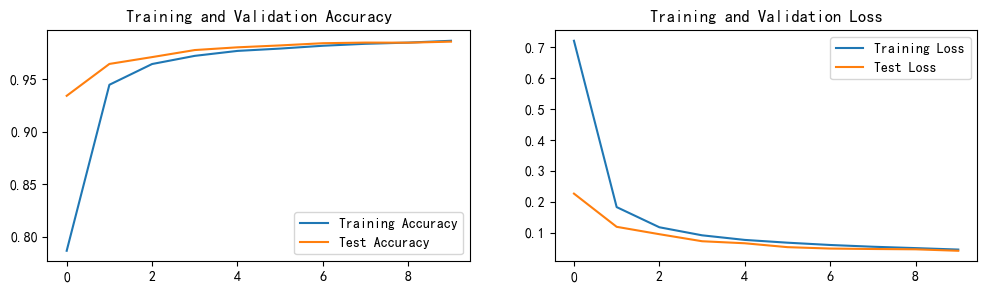

In [15]:
import matplotlib.pyplot as plt
#hide warnings
import warnings
warnings.filterwarnings("ignore")               #ignore warinings
plt.rcParams['font.sans-serif']    = ['SimHei'] #make it work on Chinese label
plt.rcParams['axes.unicode_minus'] = False      #make it work on '-'
plt.rcParams['figure.dpi']         = 100        #resolution of picture

epochs_range = range(epochs)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()